In [1]:
import numpy as np
import pydicom
import os
import sys

In [12]:
from pylab import *
import pandas as pd
import nibabel as nib

In [3]:
subject_folder = '/Users/shwetankpanwar/Documents/BTP Data/abdul kadir/'
folder_list = os.listdir(subject_folder)

In [4]:
def dcm_lst(subject_folder):
    #Function to develop list of DICOM files present in a directory.
    #Filename should start with a single alphabet followed by a digit i.e. 'Z01', 'Z11' 
    lstDCM = []
    if not os.path.exists(subject_folder):
        print("Subject Path not found. Exiting..")
        sys.exit()
    for dirname, subdirList, fileList in os.walk(subject_folder):
        for filename in fileList:
            if filename[1].isdigit():
                lstDCM.append(os.path.join(dirname,filename))
    return lstDCM    

In [5]:
def dcm_array(subject_folder, orientation = None):
    lst_DCM = dcm_lst(subject_folder)
    refSlice = pydicom.read_file(lst_DCM[0])
    pixel_dim = (int(refSlice.Rows),int(refSlice.Columns),int(len(lst_DCM)))
    print("Array Dimensions:")
    print(pixel_dim)
    array_dicom = np.zeros(pixel_dim,dtype = refSlice.pixel_array.dtype)
    for filename in lst_DCM:
        da = pydicom.read_file(filename)
        array_dicom[:,:,(int(da.InstanceNumber)-1)] = da.pixel_array
    return array_dicom    

In [6]:
def dcm_lst_orientation(lstDCM):
    #Returns DICOM orientation in form of string array for the correct stacking of array
    #lstDCM : list of all DICOM files in the directory
    arr_orientation = []
    for filepath in lstDCM:
        dat = pydicom.read_file(filepath)
        arr_orientation.append(dat.ImageOrientationPatient)
    return arr_orientation    

In [7]:
r = dcm_array(subject_folder)

Array Dimensions:
(512, 512, 68)


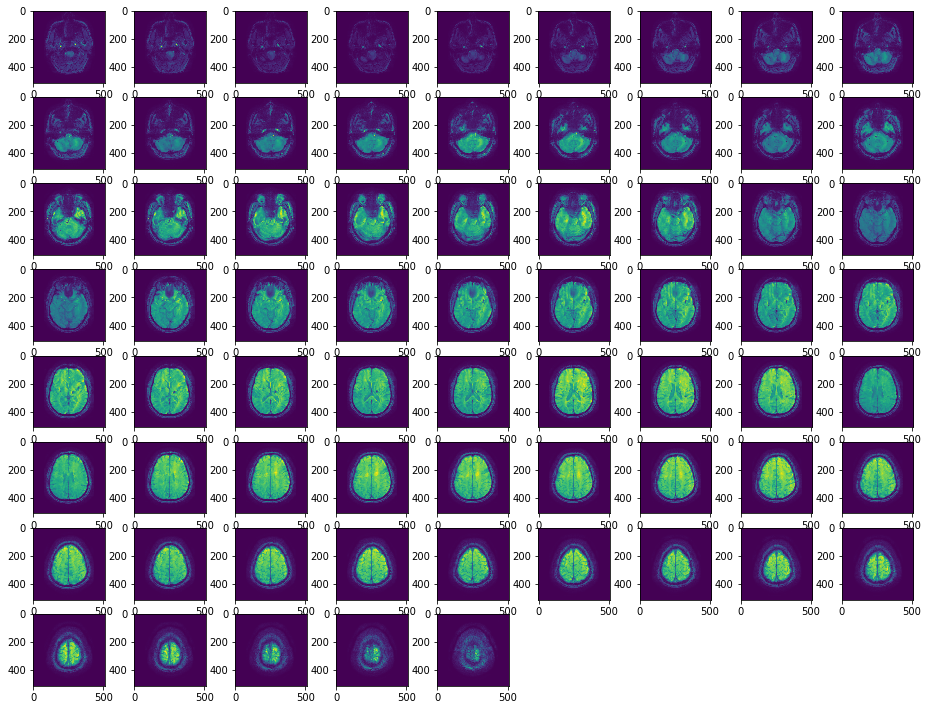

In [8]:
figure(figsize = (16,14))
for i in range(r.shape[2]):
    subplot(9,9,i+1)
    imshow(r[:,:,i])
show()    

In [9]:
s2_dir = '/Users/shwetankpanwar/Documents/BTP Data/iquebal/'
s3_dir = '/Users/shwetankpanwar/Documents/BTP Data/abdul kadir - brain/'
s4_dir = '/Users/shwetankpanwar/Documents/BTP Data/iquebal - brain/'

In [10]:
s2 = dcm_array(s2_dir)

Array Dimensions:
(512, 512, 68)


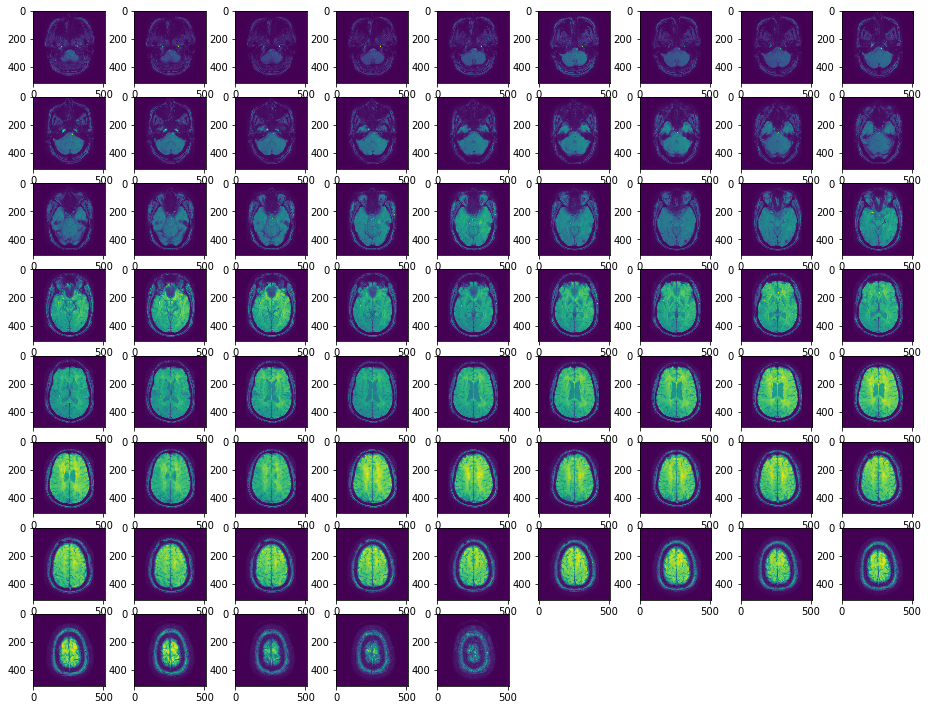

In [11]:
figure(figsize = (16,14))
for i in range(s2.shape[2]):
    subplot(9,9,i+1)
    imshow(s2[:,:,i])
show()    

In [9]:
s3_dir

'/Users/shwetankpanwar/Documents/BTP Data/abdul kadir - brain/'

In [115]:
s3_dir = s3_dir + 'A/A/A/'

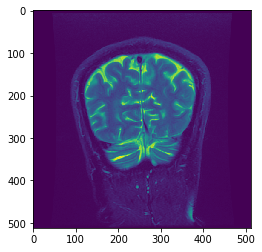

In [150]:
samp = pydicom.read_file(s3_dir + 'R/Z04')
samp.ImageOrientationPatient
figure()
imshow(samp.pixel_array)
show()

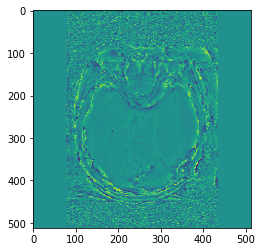

In [144]:
samp = pydicom.read_file(s3_dir + 'I/Z24')
samp.ImageOrientationPatient
figure()
imshow(samp.pixel_array)
show()

In [145]:
samp

(0008, 0000) Group Length                        UL: 980
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.388.14436926.8253287.13829.1533697582.727
(0008, 0020) Study Date                          DA: '20180808'
(0008, 0021) Series Date                         DA: '20180808'
(0008, 0022) Acquisition Date                    DA: '20180808'
(0008, 0023) Content Date                        DA: '20180808'
(0008, 0030) Study Time                          TM: '140923'
(0008, 0031) Series Time                         TM: '141830'
(0008, 0032) Acquisition Time                    TM: '141831'
(0008, 0033) Content Time                        TM: '141831'
(0008, 0050) Accession Number                    SH: 'A180808105903688'
(0008, 0060) Modality            

In [56]:
samp = pydicom.read_file(s3_dir + 'A/Z20')
samp.ImageOrientationPatient
samp.InstanceNumber

"22"

In [12]:
samp

(0008, 0000) Group Length                        UL: 604
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.388.14436926.8253287.13829.1533697581.789
(0008, 0020) Study Date                          DA: '20180808'
(0008, 0021) Series Date                         DA: '20180808'
(0008, 0022) Acquisition Date                    DA: '20180808'
(0008, 0023) Content Date                        DA: '20180808'
(0008, 0030) Study Time                          TM: '140923'
(0008, 0031) Series Time                         TM: '140923'
(0008, 0032) Acquisition Time                    TM: '140923'
(0008, 0033) Content Time                        TM: '140923'
(0008, 0050) Accession Number                    SH: 'A180808105903688'
(0008, 0060) Modality            

In [22]:
e = dcm_lst(s3_dir)

In [63]:
t = dcm_lst_orientation(e)

In [67]:
q = pd.DataFrame(t)

In [75]:
x = (q.drop_duplicates())

In [97]:
x.insert(1,"index",np.arange(len(x))+1,True)

In [98]:
x

,0,index,1,2,3,4,5
0,0.019235,1,0.999815,0.000000,-0.000000,-0.000000,-1.000000
9,0.999631,2,-0.019700,-0.018720,-0.020269,-0.081599,-0.996459
15,0.019235,3,0.999815,0.000000,-0.000000,-0.000000,-1.000000
26,0.999625,4,-0.027086,0.003989,0.027155,0.962312,-0.270589
27,0.999625,5,-0.027086,0.003989,0.027155,0.962312,-0.270589
35,0.999625,6,-0.027086,0.003989,0.027155,0.962312,-0.270589
52,0.999625,7,-0.027089,0.003978,0.027155,0.962334,-0.270510
123,0.999878,8,-0.013886,0.007140,0.015296,0.962980,-0.269137
124,-0.000000,9,1.000000,0.000000,-0.000000,-0.000000,-1.000000
125,0.999878,10,-0.013886,0.007140,0.015296,0.962980,-0.269137


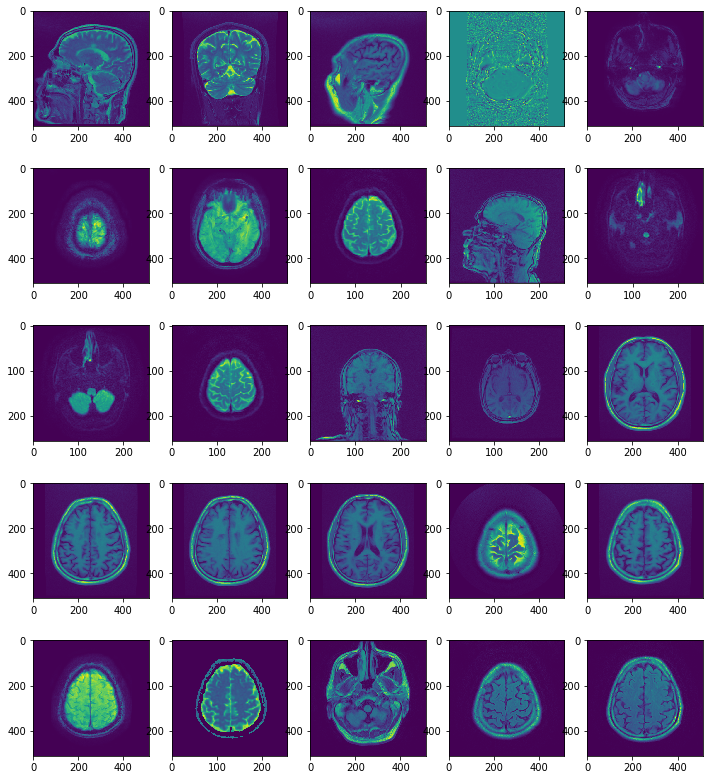

In [86]:
figure(figsize = (12,14))
for i,a in enumerate(x.index.values):
    temp = pydicom.read_file(e[a])
    subplot(5,5,i+1)
    imshow(temp.pixel_array)
show()    

In [112]:
e[9]

'/Users/shwetankpanwar/Documents/BTP Data/abdul kadir - brain/A/A/A/R/Z02'

In [113]:
e[129]

'/Users/shwetankpanwar/Documents/BTP Data/abdul kadir - brain/A/A/A/A/Z11'

In [136]:
e[26]

'/Users/shwetankpanwar/Documents/BTP Data/abdul kadir - brain/A/A/A/I/Z17'

In [87]:
xw = x/np.absolute(x)

In [92]:
xw = np.sign(x)

In [99]:
q = xw.drop_duplicates()

In [111]:
x.loc[q.index.values,:]

,0,index,1,2,3,4,5
0,0.019235,1,0.999815,0.000000,-0.000000,-0.000000,-1.000000
9,0.999631,2,-0.019700,-0.018720,-0.020269,-0.081599,-0.996459
26,0.999625,4,-0.027086,0.003989,0.027155,0.962312,-0.270589
124,-0.000000,9,1.000000,0.000000,-0.000000,-0.000000,-1.000000
129,1.000000,13,-0.000000,0.000000,-0.000000,-0.000000,-1.000000
131,1.000000,14,-0.000000,0.000000,-0.000000,1.000000,0.000000


In [94]:
xw

,0,1,2,3,4,5
0,1.0,1.0,0.0,0.0,0.0,-1.0
9,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,1.0,1.0,0.0,0.0,0.0,-1.0
26,1.0,-1.0,1.0,1.0,1.0,-1.0
27,1.0,-1.0,1.0,1.0,1.0,-1.0
35,1.0,-1.0,1.0,1.0,1.0,-1.0
52,1.0,-1.0,1.0,1.0,1.0,-1.0
123,1.0,-1.0,1.0,1.0,1.0,-1.0
124,0.0,1.0,0.0,0.0,0.0,-1.0
125,1.0,-1.0,1.0,1.0,1.0,-1.0


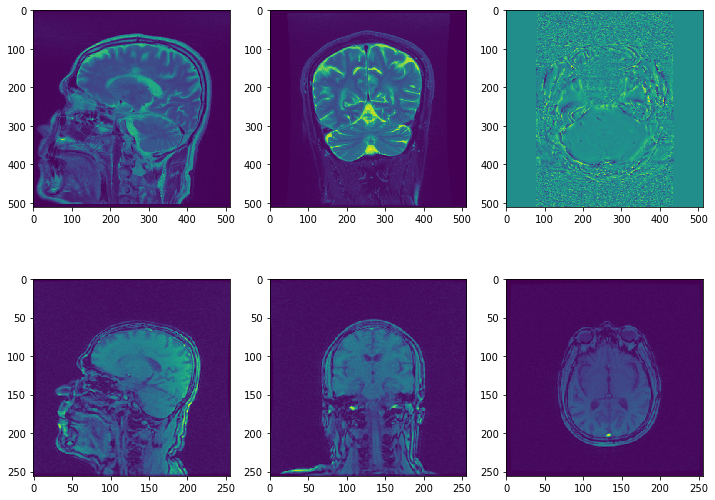

In [100]:
figure(figsize = (12,14))
for i,a in enumerate(q.index.values):
    temp = pydicom.read_file(e[a])
    subplot(3,3,i+1)
    imshow(temp.pixel_array)
show()    

In [146]:
x.loc[q.index.values,:]

,0,index,1,2,3,4,5
0,0.019235,1,0.999815,0.000000,-0.000000,-0.000000,-1.000000
9,0.999631,2,-0.019700,-0.018720,-0.020269,-0.081599,-0.996459
26,0.999625,4,-0.027086,0.003989,0.027155,0.962312,-0.270589
124,-0.000000,9,1.000000,0.000000,-0.000000,-0.000000,-1.000000
129,1.000000,13,-0.000000,0.000000,-0.000000,-0.000000,-1.000000
131,1.000000,14,-0.000000,0.000000,-0.000000,1.000000,0.000000


In [156]:
q.iloc[0]

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
5   -1.0
Name: 0, dtype: float64

In [14]:
new_image = nib.Nifti1Image(s2, affine = np.eye(4))

In [15]:
new_image

In [17]:
nib.save(new_image, 'test_image.nii')

In [18]:
abdul = nib.Nifti1Image(r, affine = np.eye(4))

In [19]:
nib.save(abdul, 'test_image_abdul.nii')

In [21]:
s = pydicom.read_file(e[2])

AttributeError: 'numpy.ndarray' object has no attribute 'pixel_array'